# restore the patient - k-mer table by H*W

H: n_patients * k-metakmers

V: (shared matrix across dataset) k-metakmers * k-mers

see [This paper](doi.org/10.1016/j.cell.2019.05.006) for more info

In [1]:
import pandas as pd
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
H_norm = pd.read_csv('~/Data/liger_output/TCGA_5000_hnorm.csv', header = 0, index_col = 0)

In [2]:
H_norm.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12
TCGA-TM-A84O,0.000000,0.000000,0.004726,0.000079,0.000000,0.000000,0.017302,0.019183,0.004068,0.018571,0.000000,0.006775
TCGA-BF-AAP2,0.000000,0.000000,0.008301,0.000073,0.000000,0.000000,0.011007,0.013944,0.004707,0.019546,0.000000,0.006719
TCGA-EJ-7794,0.021500,0.024170,0.005403,0.015434,0.011278,0.006177,0.003169,0.004546,0.000588,0.015342,0.004595,0.000235
TCGA-CV-A45Q,0.019262,0.023861,0.001450,0.016922,0.008791,0.014174,0.008486,0.009466,0.002330,0.010254,0.021015,0.003093
TCGA-DH-5140,0.000000,0.000000,0.007134,0.000000,0.000000,0.000000,0.013405,0.003905,0.007575,0.019797,0.000000,0.007609


In [3]:
W = pd.read_csv('~/Data/liger_output/TCGA_5000_w.csv', header = 0, index_col = 0)

In [4]:
W.head()

,TGTCTGCCTGGCCCAGCTCT,TCTGCCTGGCCCAGCTCTGT,CCAGCTCTGTGGTGCCTCCA,CAGCTCTGTGGTGCCTCCAG,AGCTCTGTGGTGCCTCCAGG,GCTCTGTGGTGCCTCCAGGA,CTCTGTGGTGCCTCCAGGAC,TCTGTGGTGCCTCCAGGACA,CTGTGGTGCCTCCAGGACAT,TGTGGTGCCTCCAGGACATG,...,TGGGTCACTAAGGTCTGACC,GTGGGTCACTAAGGTCTGAC,AGTGGGTCACTAAGGTCTGA,CAGTGGGTCACTAAGGTCTG,GCAGTGGGTCACTAAGGTCT,AGCAGTGGGTCACTAAGGTC,AAGCAGTGGGTCACTAAGGT,CAAGCAGTGGGTCACTAAGG,ACAAGCAGTGGGTCACTAAG,ACCTGTAATCACGATGTCCA
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.401420,0.000000,...,2.930888,2.880032,2.595024,2.536716,2.410823,2.369528,2.310621,2.148018,1.985469,3.207009
2,3.854987,4.133120,3.483612,3.468414,3.487237,3.496474,3.467066,3.193378,2.076457,1.817816,...,1.337156,1.308703,1.457340,1.555876,1.646847,1.619650,1.726003,1.682072,1.516203,1.678243
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.600541
4,0.000000,0.194937,0.000000,0.000000,0.000000,0.000000,0.000000,0.120177,1.213296,2.378857,...,4.317560,4.369497,4.331804,4.482808,4.602160,4.616234,4.782646,4.802512,4.782026,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.592720,0.573106,0.702889,0.841672,0.695893,0.696588,0.806944,0.814189,0.983984,4.665028


In [5]:
import numpy as np
restored = np.matmul(H_norm.to_numpy(), W.to_numpy())

In [6]:
restored_df = pd.DataFrame(restored, columns = W.columns, index = H_norm.index)

In [7]:
restored_df.head()

,TGTCTGCCTGGCCCAGCTCT,TCTGCCTGGCCCAGCTCTGT,CCAGCTCTGTGGTGCCTCCA,CAGCTCTGTGGTGCCTCCAG,AGCTCTGTGGTGCCTCCAGG,GCTCTGTGGTGCCTCCAGGA,CTCTGTGGTGCCTCCAGGAC,TCTGTGGTGCCTCCAGGACA,CTGTGGTGCCTCCAGGACAT,TGTGGTGCCTCCAGGACATG,...,TGGGTCACTAAGGTCTGACC,GTGGGTCACTAAGGTCTGAC,AGTGGGTCACTAAGGTCTGA,CAGTGGGTCACTAAGGTCTG,GCAGTGGGTCACTAAGGTCT,AGCAGTGGGTCACTAAGGTC,AAGCAGTGGGTCACTAAGGT,CAAGCAGTGGGTCACTAAGG,ACAAGCAGTGGGTCACTAAG,ACCTGTAATCACGATGTCCA
TCGA-TM-A84O,0.824301,0.853009,0.864927,0.869948,0.874418,0.876536,0.879841,0.867256,0.822955,0.816968,...,0.773821,0.767215,0.761722,0.743233,0.731623,0.725411,0.720123,0.706700,0.698782,0.830887
TCGA-BF-AAP2,0.648933,0.686908,0.678472,0.683378,0.688031,0.689780,0.693013,0.671590,0.625184,0.615404,...,0.790212,0.783604,0.779781,0.765683,0.754655,0.748622,0.746858,0.732725,0.724527,0.817450
TCGA-EJ-7794,0.382805,0.431753,0.392979,0.396085,0.400598,0.401658,0.403458,0.372294,0.328701,0.318111,...,0.663231,0.657542,0.652838,0.647018,0.636485,0.630141,0.635563,0.619899,0.609649,0.709879
TCGA-CV-A45Q,0.510580,0.541959,0.547608,0.549380,0.554252,0.555741,0.557692,0.539668,0.516175,0.507094,...,0.634455,0.630203,0.623157,0.614100,0.604593,0.599570,0.596028,0.582907,0.573897,0.624176
TCGA-DH-5140,0.326992,0.382290,0.364427,0.369795,0.374651,0.374989,0.378114,0.342357,0.279270,0.258549,...,0.815707,0.809067,0.804172,0.798141,0.786853,0.780655,0.777613,0.763307,0.754740,0.851302


# use corrected k-mer count to infer KIR allele

In [8]:
kmer_df = pd.read_csv('~/Data/kmer_df', header = 0, index_col = 0) # which kmer belong to which KIR
# summing up
selected_kmer = kmer_df.loc[kmer_df['kmer'].isin(W.columns)]

def sum_up(df):
    '''
    given the double normalized kmer, return the sum by KIR dataframe
    '''
    sum_df = pd.DataFrame(index = df.index, columns = selected_kmer['gene'].unique())
    for name, group in selected_kmer.groupby(by = 'gene')['kmer']:
        sum_df[name] = df[group].sum(axis = 1)
    return(sum_df)

In [9]:
restored_sum = sum_up(restored_df)

In [10]:
restored_sum.head() # sum of corrected k-mer count for each KIR

,KIR2DP1,KIR2DS4,KIR2DS5,KIR2DS2,KIR2DS3,KIR2DL1,KIR2DL5,KIR2DL4,KIR3DS1,KIR3DL2,KIR3DL3,KIR3DP1
TCGA-TM-A84O,213.466480,90.001659,0.817316,7.291512,0.805295,10.940566,46.466815,271.305646,0.085657,83.672150,251.819943,323.086034
TCGA-BF-AAP2,176.516618,105.092092,0.771942,7.832734,0.959482,10.467038,46.747781,270.115245,0.099117,85.252815,256.799928,295.076277
TCGA-EJ-7794,117.751203,70.801652,104.017716,9.635282,22.008737,7.724709,629.554593,188.926898,0.104017,77.171503,241.620310,209.676553
TCGA-CV-A45Q,151.373000,46.021912,93.469388,18.344267,91.232087,8.566279,759.159087,207.938531,0.149718,72.518342,207.359571,236.239794
TCGA-DH-5140,106.028554,102.054489,0.712149,8.542745,0.907787,9.162497,47.051227,298.659191,0.159489,87.138850,259.038457,309.829949


# generate cutoff for these k-mer sums
1. anchoring KIR: most people has 2 copies (KIR3DL3, KIR3DP1,KIR2DL2 and KIR3DL2)
2. high frequency non-anchor genes that are present at least once inmost individuals (KIR2DP1, KIR2DL1, KIR2DS4 and KIR2DL5) 
3. low frequency non-anchor genes that are present less than once in most individuals (KIR2DS3, KIR2DS2,KIR2DS5 and KIR3DS1).
[ref](https://psb.stanford.edu/psb-online/proceedings/psb19/pyke.pdf)

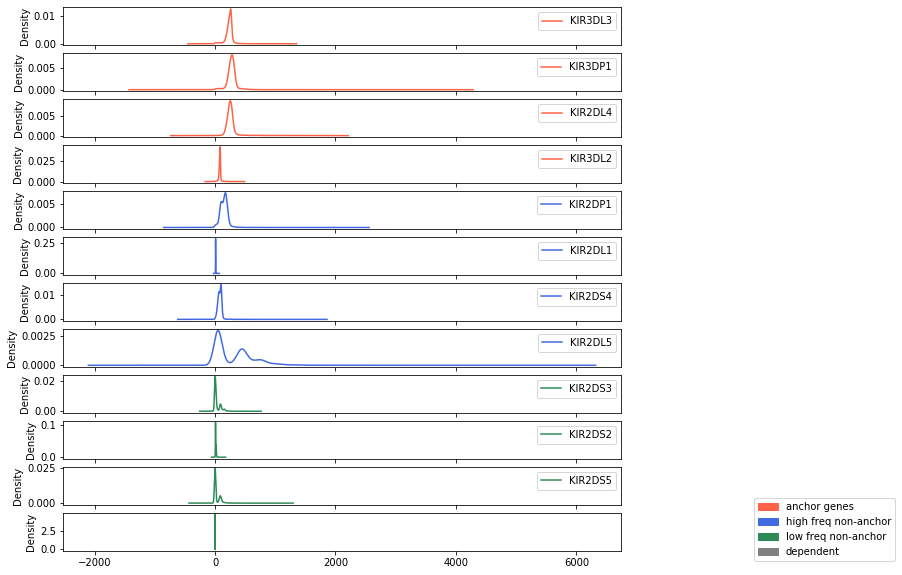

In [11]:
%matplotlib inline
dependent = ['KIR2DS1', 'KIR2DL3', 'KIR2DL2', 'KIR3DL1', 'KIR2DL5A', 'KIR2DL5B']
# assign color to different KIR genes
color = pd.Series(index = restored_sum.columns.tolist() + dependent, data = 'black')

anchor_genes = ['KIR3DL3', 'KIR3DP1', 'KIR2DL4', 'KIR3DL2'] #### 
color[anchor_genes] = 'tomato'

high_genes = ['KIR2DP1','KIR2DL1', 'KIR2DS4', 'KIR2DL5'] # high freq kirs
color[high_genes] = 'royalblue'

low_genes = ['KIR2DS3','KIR2DS2','KIR2DS5','KIR3DS1']
color[low_genes] = 'seagreen'

replaceable = ['KIR2DS2', 'KIR2DS3', 'KIR2DP1', 'KIR2DL1', 'KIR3DS1', 'KIR2DS5', 'KIR2DS4']

sequence = anchor_genes + high_genes + low_genes

# custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='tomato', edgecolor='tomato',label='anchor genes'),
                  Patch(facecolor='royalblue', edgecolor='royalblue',label='high freq non-anchor'),
                  Patch(facecolor='seagreen', edgecolor='seagreen',label='low freq non-anchor'),
                  Patch(facecolor='grey', edgecolor='grey',label='dependent')]

# plot distribution of each KIR kmers
restored_sum.loc[:,sequence].plot(kind = 'kde', subplots = True, figsize = (10,10), style = color[sequence].tolist())
plt.legend(handles=legend_elements, bbox_to_anchor=(1.5,1.5))

In [12]:
def return_cutoffs(gene, w):
    # make kernel
    kernel = gaussian_kde(w[gene])
    
    max_value = w[gene].max()
    # finding the values and the x axis of the fitted curve
    y = kernel(np.arange(0, max_value, max_value/float(1000)))
    x = np.arange(0, max_value, max_value/float(1000))
    
    # first derivative = 0: peaks or valleys
    dy = np.gradient(y)
    lows_index = []
    highs_index = []
    for i in range(len(dy)):
        if dy[i-1] < 0 and dy[i] >= 0:
            lows_index.append(x[i])
        elif dy[i-1] > 0 and dy[i] <= 0:
            highs_index.append(x[i])
    
    # second derivate = 0; inflection point
    inflection = []
    ddy = np.gradient(dy)
    for i in range(len(ddy)):
        if ddy[i] > 0 and ddy[i] < 0:
            inflection.append(x[i])
        elif ddy[i] < 0 and ddy[i] > 0:
            inflection.append(x[i])
            
    # select true peaks by values of y: at least 1/5 or the max of y
    maxium_y = max(y)
    
    new_highs = []
    for i in highs_index:
        
        if y[np.where(x == i)] > maxium_y*0.2:
            
            new_highs.append(i)
    
    # select boundary for peaks
    all_index = new_highs + lows_index
    all_index = np.sort(np.array(all_index))

    
    # smallest peak 
    lower_bound = np.asscalar(np.where(all_index == new_highs[0])[0]) - 1
    if lower_bound == -1: # sometimes the peak is the first value
        lower_bound = 0
    
    # biggest peak
    upper_bound = np.asscalar(np.where(all_index == new_highs[-1])[0]) + 1
            
    selected_index = all_index[lower_bound: upper_bound + 1]
    
    # remove peaks, retain only threshold
    remove_highs = list(set(selected_index) - set(new_highs))
    
    
    # add upper bound
    remove_highs.append(max_value)
    
    # add lower bound
    if 0 not in remove_highs:
        remove_highs.append(0)
    
    # sort
    remove_highs = np.sort(np.array(remove_highs)).tolist() # threshold
    
    return(x, y, remove_highs)       


In [13]:
def assign_copy_number(gene, thres):
    binned = pd.cut(restored_sum[gene], thres)
    category =list(binned.cat.categories.values)
    
    putative_copy_number = [0]*len(category)
    
    max_category = binned.value_counts().idxmax()
    max_category_index = category.index(max_category)
    
    if gene in anchor_genes: # most people got two copies
        common_copy = 2
    if gene in high_genes: # most get 1 copy
        common_copy = 1
    if gene in low_genes:
        common_copy = 0
        
    putative_copy_number[max_category_index] = common_copy
        
    # fill the rest
    i = 1
    while max_category_index -i >= 0 and common_copy-i >=0:
        putative_copy_number[max_category_index -i] = common_copy-i
        i += 1
        
    i = 1
    while max_category_index +i < len(category):
        putative_copy_number[max_category_index +i] = common_copy+i
        i += 1
            
    
    
    interval_to_copy_number = dict(zip(category, putative_copy_number))
    
    print(interval_to_copy_number)
    return(binned.map(interval_to_copy_number), interval_to_copy_number)
    

/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/ipykernel_launcher.py:45: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/ipykernel_launcher.py:50: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


{Interval(0.0, 112.997, closed='right'): 1, Interval(112.997, 387.807, closed='right'): 2, Interval(387.807, 903.98, closed='right'): 3}
{Interval(0.0, 120.03, closed='right'): 1, Interval(120.03, 577.286, closed='right'): 2, Interval(577.286, 2857.849, closed='right'): 3}
{Interval(0.0, 470.609, closed='right'): 2, Interval(470.609, 1475.262, closed='right'): 3}
{Interval(0.0, 8.84, closed='right'): 1, Interval(8.84, 122.123, closed='right'): 2, Interval(122.123, 327.408, closed='right'): 3}
{Interval(0.0, 126.257, closed='right'): 0, Interval(126.257, 465.787, closed='right'): 1, Interval(465.787, 1706.179, closed='right'): 2}
{Interval(0.0, 3.035, closed='right'): 0, Interval(3.035, 16.975, closed='right'): 1, Interval(16.975, 47.417, closed='right'): 2}
{Interval(0.0, 78.096, closed='right'): 0, Interval(78.096, 207.016, closed='right'): 1, Interval(207.016, 1239.619, closed='right'): 2}
{Interval(0.0, 248.577, closed='right'): 1, Interval(248.577, 661.467, closed='right'): 2, Inte

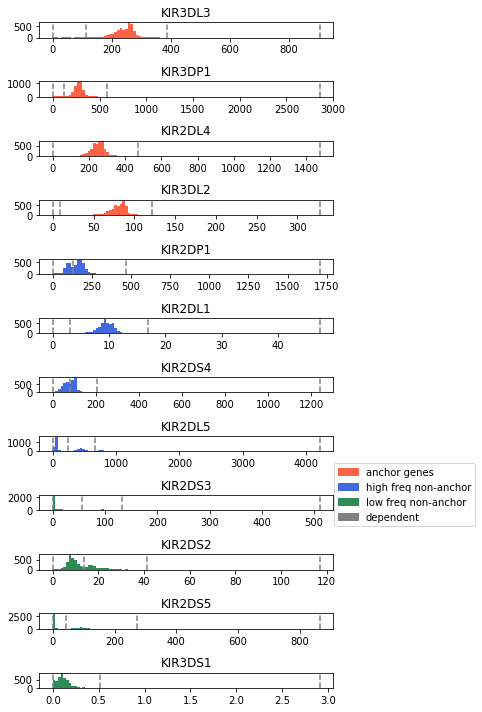

In [14]:


gene_peaks, gene_cutoffs = {}, {}

fig, ax = plt.subplots(nrows = 12, ncols = 1, figsize = (5, 10))
i = 0
kir_copy_number = pd.DataFrame(index = restored_sum.index, columns = restored_sum.columns)
for gene in anchor_genes + high_genes + low_genes:
    # get threshold
    x, y, thres = return_cutoffs(gene, restored_sum)
    
    # make threshold to copy number
    copy_number, mapper = assign_copy_number(gene, thres)
    
    kir_copy_number[gene] = copy_number
    
    # plot
    ax[i].hist(restored_sum[gene], bins = 100, color = color[gene])
    for xc in thres:
        ax[i].axvline(x=xc, color='grey', linestyle='--')
    ax[i].set_title(gene)
    i+=1
plt.tight_layout()
plt.legend(handles=legend_elements, bbox_to_anchor=(1.5,15))

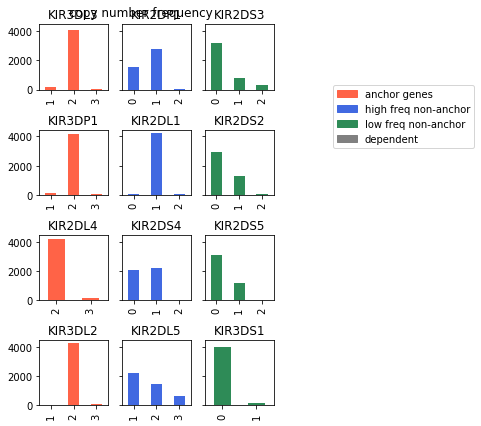

In [15]:
f,ax = plt.subplots(4,3, figsize = (4,6), sharey = True)
i = 0
for col in anchor_genes:
    kir_copy_number[col].value_counts().sort_index().plot(kind = 'bar', ax = ax[i, 0], color = color[col])
    ax[i,0].set_title(col)
    i += 1
i=0
for col in high_genes:
    kir_copy_number[col].value_counts().sort_index().plot(kind = 'bar', ax = ax[i, 1], color = color[col])
    ax[i, 1].set_title(col)
    i += 1
i=0
for col in low_genes:
    kir_copy_number[col].value_counts().sort_index().plot(kind = 'bar', ax = ax[i, 2], color = color[col])
    ax[i, 2].set_title(col)
    i += 1
plt.suptitle('copy number frequency')
plt.tight_layout()
plt.legend(handles=legend_elements, bbox_to_anchor=(4,5))

In [16]:
kir_copy_number.head()

,KIR2DP1,KIR2DS4,KIR2DS5,KIR2DS2,KIR2DS3,KIR2DL1,KIR2DL5,KIR2DL4,KIR3DS1,KIR3DL2,KIR3DL3,KIR3DP1
TCGA-TM-A84O,1,1,0,0,0,1,1,2,0,2,2,2
TCGA-BF-AAP2,1,1,0,0,0,1,1,2,0,2,2,2
TCGA-EJ-7794,0,0,1,0,0,1,2,2,0,2,2,2
TCGA-CV-A45Q,1,0,1,1,1,1,3,2,0,2,2,2
TCGA-DH-5140,0,1,0,0,0,1,1,2,0,2,2,2


# Impute copy number of KIR without specific k-mer
All of the genes that do not have any unique k-mers are knownto co-segregate with other KIR genes. Thus, we inferred copy number for these genes from thecopy number of the co-segregating gene as follows: 

1. individuals typically have as many copies of 
- KIR2DS1 as they do KIR3DS1
- KIR2DL2 as KIR2DS2
- KIR3DL1 as KIR2DS4
- KIR2DL5A as the combined total of KIR2DS3 and KIR2DS5. 

2. Furthermore, individualstypically have an inverse number of 
- KIR2DL3 as KIR2DS2 (e.g. 0 KIR2DL3 and 2 KIR2DS2, 1KIR2DL3 and 1 KIR2DS2 or 2 KIR2DL3 and 0 KIR2DS2)
[ref](https://psb.stanford.edu/psb-online/proceedings/psb19/pyke.pdf)

In [17]:
# double chekc
[d in kir_copy_number.columns for d in dependent]

[False, False, False, False, False, False]

In [18]:
# use the above rule to impute the rest (RULE 1)
kir_copy_number['KIR2DS1'] = kir_copy_number['KIR3DS1']
kir_copy_number['KIR2DL2'] = kir_copy_number['KIR2DS2']
kir_copy_number['KIR2DL1'] = kir_copy_number['KIR2DS4']
kir_copy_number['KIR2DL5A'] = kir_copy_number['KIR2DS3'].astype(float) + kir_copy_number['KIR2DS5'].astype(float)

# (RULE2)
kir_copy_number['KIR2DL3'] = 2-kir_copy_number['KIR2DS2'].astype(float)



In [19]:
kir_copy_number.count() # some nan? due to subtract value

KIR2DP1     4317
KIR2DS4     4317
KIR2DS5     4316
KIR2DS2     4315
KIR2DS3     4316
KIR2DL1     4317
KIR2DL5     4317
KIR2DL4     4317
KIR3DS1     4178
KIR3DL2     4317
KIR3DL3     4317
KIR3DP1     4315
KIR2DS1     4178
KIR2DL2     4315
KIR2DL5A    4315
KIR2DL3     4315
dtype: int64

In [20]:
kir_copy_number.to_csv('imputed_copy_number.csv')

# validate race population frequency

In [21]:
# race info
clinical = pd.read_csv('/cellar/users/ramarty/Data/hla_sex/clean_data/clinical.csv', index_col=0, header = 0)

In [22]:
clinical.head()

,Age,Sex,Tissue,Race,days_to_death,days_to_last_followup,vital_status
TCGA-18-3406,67,Male,LUSC,white,371.0,NaN,dead
TCGA-18-3407,72,Male,LUSC,asian,136.0,NaN,dead
TCGA-18-3409,74,Male,LUSC,white,NaN,2417.0,alive
TCGA-18-3410,81,Male,LUSC,NaN,146.0,NaN,dead
TCGA-18-3416,83,Male,LUSC,NaN,NaN,956.0,alive


In [23]:
clinical['Race'].unique()

array(['white', 'asian', nan, 'black or african american',
       'american indian or alaska native',
       'native hawaiian or other pacific islander'], dtype=object)

In [24]:
# files
# asian_frequencies.txt  black_frequencies.txt white_frequencies.txt

In [25]:
race_dict = {'asian': 'asian',
            'black': 'black or african american',
            'white': 'white'} # key = filename; # value: TCGA category

In [26]:
def validate(race, kit = 'all'):
    ''' plot race frequency and imputed frequency'''
    # measured frequency
    freqs = pd.read_csv('/cellar/users/ramarty/Data/kir/validation/frequencies/{0}_frequencies.txt'.format(race), header=0, comment = '#')
    freqs.set_index('gene', inplace = True)
    freqs.columns = ['population']
    
    
    # imputed frequency
    tcga_race = race_dict[race]
    race_df = kir_copy_number.loc[kir_copy_number.index.isin(clinical.loc[clinical['Race'] == tcga_race].index)]
    
    if kit != 'all': 
        race_df = race_df.loc[race_df.index.isin(capture_kits.loc[capture_kits['KIT'] == kit, 'SHORT_ID'])]
        
    race_df = race_df.sum()/race_df.shape[0]*100

    freqs.loc[freqs.index, 'imputed_TCGA'] = race_df
    
    return(freqs)

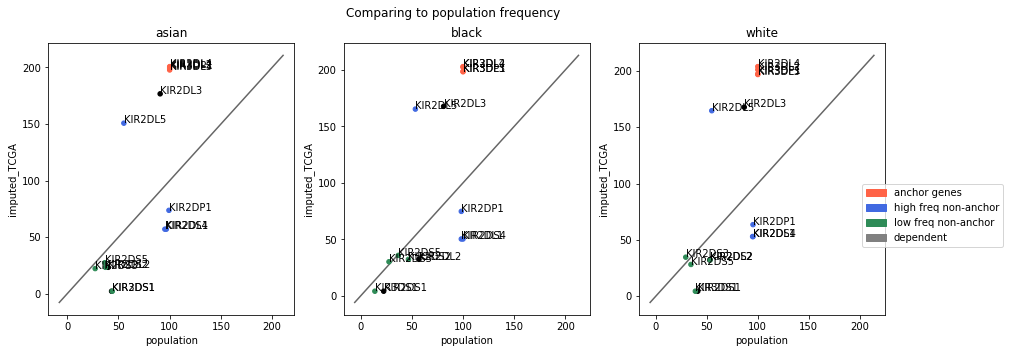

In [27]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
i = 0
for r in race_dict.keys():
    freqs = validate(r)
    freqs.dropna(inplace = True)
    
    # add color
    
    
    freqs.plot(kind = 'scatter', x = 'population', y = 'imputed_TCGA', ax = ax[i], c = freqs.index.map(color))
    for txt in freqs.index.tolist():
        ax[i].text(freqs.loc[txt, 'population'] , freqs.loc[txt,'imputed_TCGA'], txt)
    
    lims = [
        np.min([ax[i].get_xlim(), ax[i].get_ylim()]),  # min of both axes
        np.max([ax[i].get_xlim(), ax[i].get_ylim()]),  # max of both axes
    ]

    # now plot both limits against eachother
    ax[i].plot(lims, lims, 'k-', alpha=0.6, zorder=0)
    ax[i].set_title(r)
    
    i += 1

plt.suptitle('Comparing to population frequency')
plt.legend(handles=legend_elements, bbox_to_anchor=(1.5,0.5))

# check if specific capture kit is screwed

In [28]:
capture_kits = pd.read_csv('/cellar/users/ramarty/Data/kir/ref/sample.capture.kit', sep='\t')
capture_kits = capture_kits[capture_kits.SHORT_ID.isin(kir_copy_number.index)] # only select those included in study


In [29]:
capture_kits.head()

,ID,SHORT_ID,KIT
5,TCGA-02-2483-10A-01D-1494-08,TCGA-02-2483,Agilent Custom
7,TCGA-02-2486-10A-01D-1494-08,TCGA-02-2486,Agilent Custom
8,TCGA-04-1331-10A-01W-0486-08,TCGA-04-1331,Agilent Custom
9,TCGA-04-1332-10A-01W-0487-08,TCGA-04-1332,Agilent Custom
10,TCGA-04-1332-10A-01W-0489-09,TCGA-04-1332,Sureselect.38


In [30]:
capture_kits['KIT'].unique()

array(['Agilent Custom', 'Sureselect.38', 'Nimblegen.SQEZ2',
       'Nimblegen HGSC', 'Nimblegen hg18', 'Nimblegen.SQEZ3'],
      dtype=object)

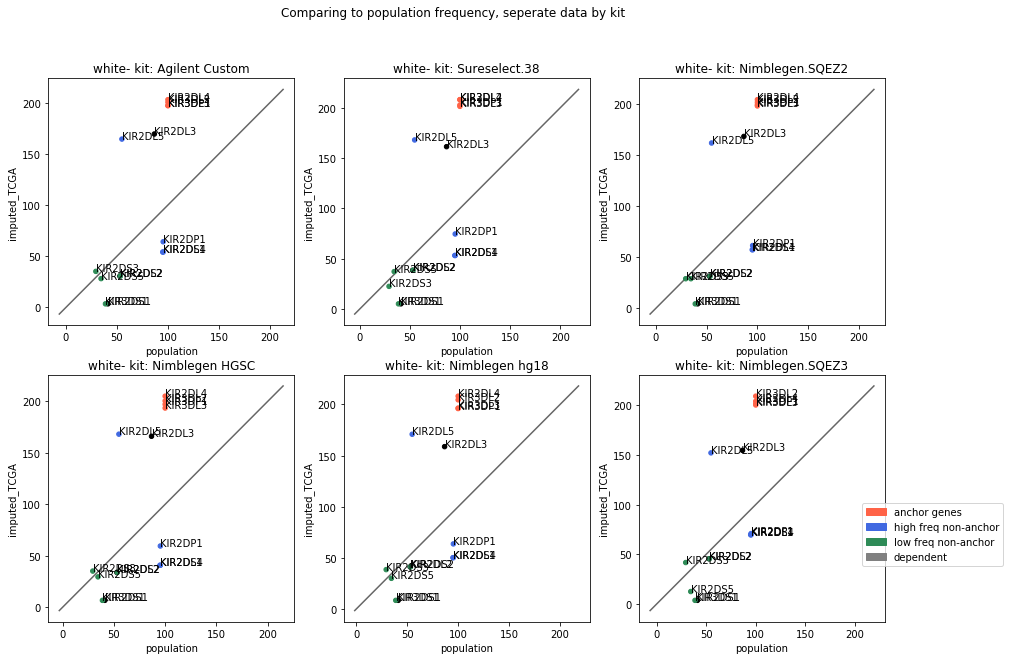

In [31]:
fig, ax = plt.subplots(2,3, figsize=(15,10))
ax = ax.flatten()

i = 0
r = 'white'
for k in capture_kits['KIT'].unique():
    freqs = validate(r, kit = k)
    freqs.dropna(inplace = True)
    
    # add color
    
    
    freqs.plot(kind = 'scatter', x = 'population', y = 'imputed_TCGA', ax = ax[i], c = freqs.index.map(color))
    for txt in freqs.index.tolist():
        ax[i].text(freqs.loc[txt, 'population'] , freqs.loc[txt,'imputed_TCGA'], txt)
    
    lims = [
        np.min([ax[i].get_xlim(), ax[i].get_ylim()]),  # min of both axes
        np.max([ax[i].get_xlim(), ax[i].get_ylim()]),  # max of both axes
    ]

    # now plot both limits against eachother
    ax[i].plot(lims, lims, 'k-', alpha=0.6, zorder=0)
    ax[i].set_title(r + '- kit: ' +k)
    
    i += 1

plt.suptitle('Comparing to population frequency, seperate data by kit')
plt.legend(handles=legend_elements, bbox_to_anchor=(1.5,0.5))

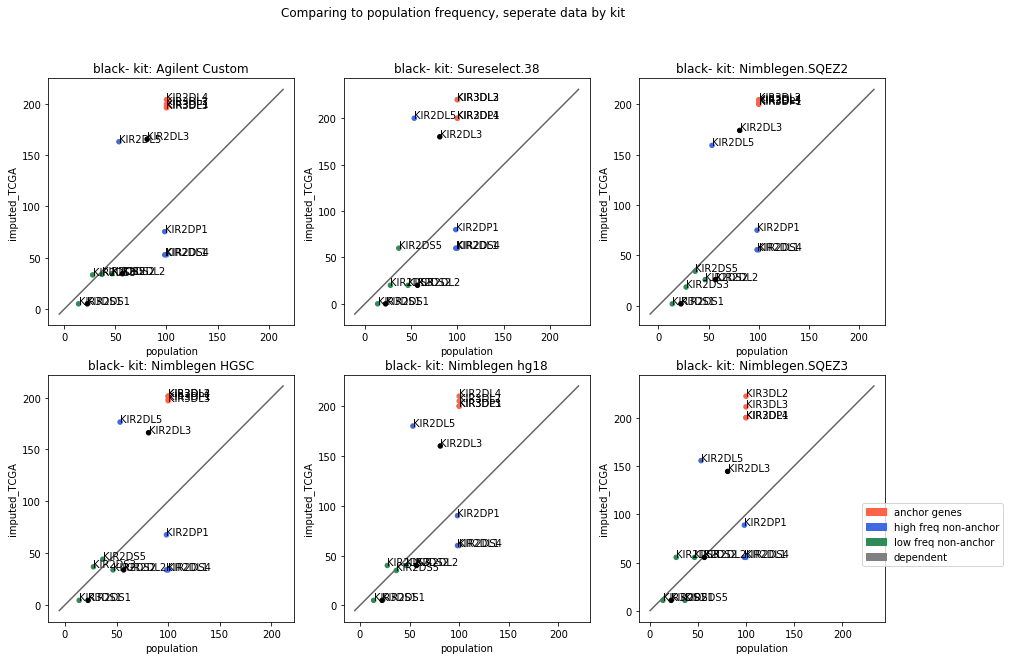

In [32]:
fig, ax = plt.subplots(2,3, figsize=(15,10))
ax = ax.flatten()

i = 0
r = 'black'
for k in capture_kits['KIT'].unique():
    freqs = validate(r, kit = k)
    freqs.dropna(inplace = True)
    
    # add color
    
    
    freqs.plot(kind = 'scatter', x = 'population', y = 'imputed_TCGA', ax = ax[i], c = freqs.index.map(color))
    for txt in freqs.index.tolist():
        ax[i].text(freqs.loc[txt, 'population'] , freqs.loc[txt,'imputed_TCGA'], txt)
    
    lims = [
        np.min([ax[i].get_xlim(), ax[i].get_ylim()]),  # min of both axes
        np.max([ax[i].get_xlim(), ax[i].get_ylim()]),  # max of both axes
    ]

    # now plot both limits against eachother
    ax[i].plot(lims, lims, 'k-', alpha=0.6, zorder=0)
    ax[i].set_title(r + '- kit: ' +k)
    
    i += 1

plt.suptitle('Comparing to population frequency, seperate data by kit')
plt.legend(handles=legend_elements, bbox_to_anchor=(1.5,0.5))

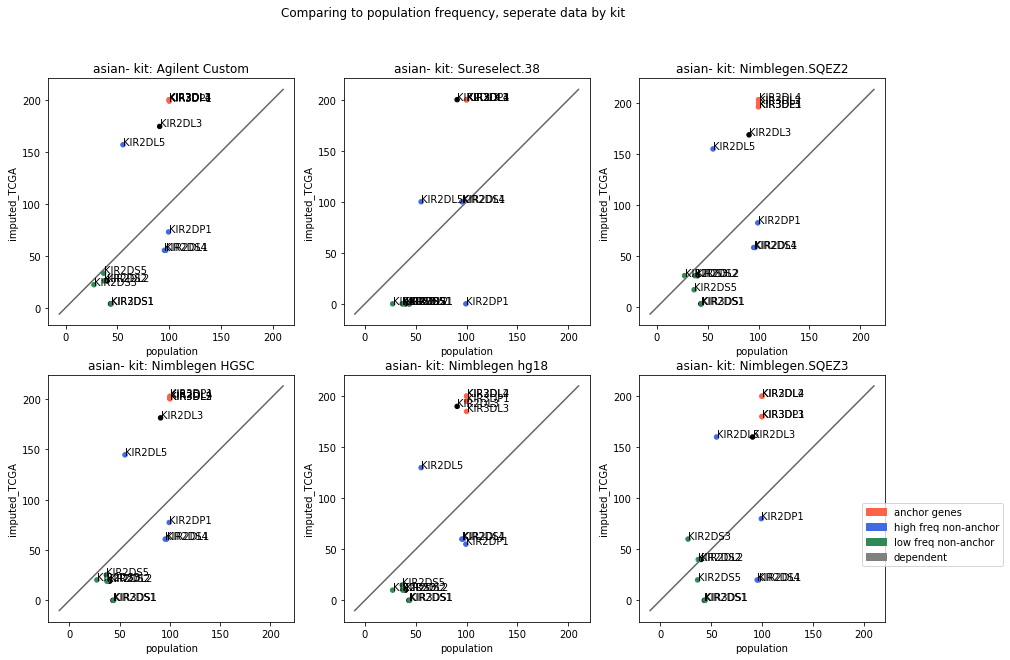

In [33]:
fig, ax = plt.subplots(2,3, figsize=(15,10))
ax = ax.flatten()

i = 0
r = 'asian'
for k in capture_kits['KIT'].unique():
    freqs = validate(r, kit = k)
    freqs.dropna(inplace = True)
    
    # add color
    
    
    freqs.plot(kind = 'scatter', x = 'population', y = 'imputed_TCGA', ax = ax[i], c = freqs.index.map(color))
    for txt in freqs.index.tolist():
        ax[i].text(freqs.loc[txt, 'population'] , freqs.loc[txt,'imputed_TCGA'], txt)
    
    lims = [
        np.min([ax[i].get_xlim(), ax[i].get_ylim()]),  # min of both axes
        np.max([ax[i].get_xlim(), ax[i].get_ylim()]),  # max of both axes
    ]

    # now plot both limits against eachother
    ax[i].plot(lims, lims, 'k-', alpha=0.6, zorder=0)
    ax[i].set_title(r + '- kit: ' +k)
    
    i += 1

plt.suptitle('Comparing to population frequency, seperate data by kit')
plt.legend(handles=legend_elements, bbox_to_anchor=(1.5,0.5))